# Use only one interactiontype to deflect the muon, no multiple scattering 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os 
from tqdm import tqdm
import pandas as pd
from matplotlib import cm
from statistics import mode
from helper_functions import energy_name

In [2]:
save_plot = True # False

# currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
# assert currentNotebook != '', "no notebook name, run cell again"

currentNotebook = "only_one_interactiontype"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

colors = {
    'brems': cm.tab10(0),
    'nuclint': cm.tab10(1), 
    'epair': cm.tab10(2),
    'ioniz': cm.tab10(3) 
}

In [3]:
df_brems = pd.read_hdf('data/only_one_interactiontype/total_defl_brems.hdf5')
df_ioniz = pd.read_hdf('data/only_one_interactiontype/total_defl_ioniz.hdf5')
df_nuclint = pd.read_hdf('data/only_one_interactiontype/total_defl_nuclint.hdf5')
df_epair = pd.read_hdf('data/only_one_interactiontype/total_defl_epair.hdf5')
df_all = pd.read_hdf('data/only_one_interactiontype/total_defl_all_stochastic_deflections.hdf5')

In [4]:
E_i = df_brems.E_i[0] * 1e3 # energy in MeV
E_f = mode(df_brems.E_f) * 1e3 # energy in MeV
n_events = len(df_brems)

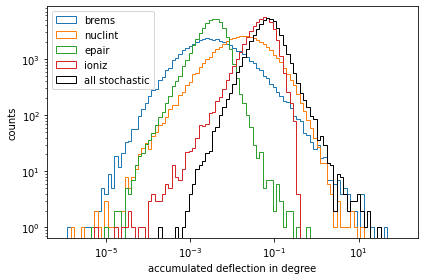

In [5]:
bins = np.logspace(-6, 2, 101)
plt.hist(df_brems.deflection, bins=bins, histtype='step', color=colors['brems'], label='brems')
plt.hist(df_nuclint.deflection, bins=bins, histtype='step', color=colors['nuclint'], label='nuclint')
plt.hist(df_epair.deflection, bins=bins, histtype='step', color=colors['epair'], label='epair')
plt.hist(df_ioniz.deflection, bins=bins, histtype='step', color=colors['ioniz'], label='ioniz')
plt.hist(df_all.deflection, bins=bins, histtype='step', color='black', label='all stochastic')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('accumulated deflection in degree')
plt.ylabel('counts')
plt.legend(loc='upper left')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_deflection.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))

In [6]:
def d_shower(x, y): 
    return np.sqrt(x**2 + y**2) / 100 # distance in meter

In [7]:
d_shower_brems = d_shower(df_brems.x_f, df_brems.y_f)
d_shower_ioniz = d_shower(df_ioniz.x_f, df_ioniz.y_f)
d_shower_nuclint = d_shower(df_nuclint.x_f, df_nuclint.y_f)
d_shower_epair = d_shower(df_epair.x_f, df_epair.y_f)
d_shower_all = d_shower(df_all.x_f, df_all.y_f)

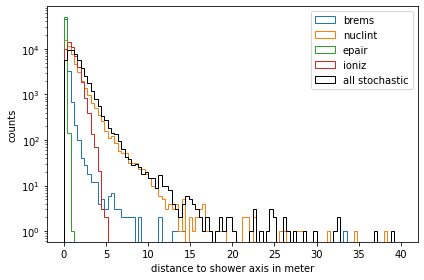

In [8]:
bins = np.linspace(0, 40, 101)
plt.hist(d_shower_brems, bins=bins, histtype='step', color=colors['brems'], label='brems')
plt.hist(d_shower_nuclint, bins=bins, histtype='step', color=colors['nuclint'], label='nuclint')
plt.hist(d_shower_epair, bins=bins, histtype='step', color=colors['epair'], label='epair')
plt.hist(d_shower_ioniz, bins=bins, histtype='step', color=colors['ioniz'], label='ioniz')
plt.hist(d_shower_all, bins=bins, histtype='step', color='black', label='all stochastic')
plt.xlabel('distance to shower axis in meter')
plt.ylabel('counts')
# plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '{}_{}_{}events_distance_showeraxis.pdf'.format(energy_name(E_i), energy_name(E_f), n_events))